In [27]:
from collections import namedtuple
import matplotlib.pyplot as plt
from sympy.ntheory import sqrt_mod
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import random
from scipy.stats import chisquare

In [38]:

def binaryToDecimal(binary): 
      
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return decimal 

def isPrime(n):
    for i in range(2,int(n**0.5)+1):
        if n%i==0:
            return False
    return True


def valid(P):
    # print((P.y**2)%p)
    # print((P.x**3 + a*P.x + b) % p)                  
    if P == O:
        return True
    else:
        return (
            (P.y**2 - (P.x**3 + a*P.x + b)) % p == 0 and
            0 <= P.x < p and 0 <= P.y < p)

def inv_mod_p(x):
    if x % p == 0:
        raise ZeroDivisionError("Impossible inverse")
    return pow(x, p-2, p)

def ec_inv(P):
    if P == O:
        return P
    return Point(P.x, (-P.y)%p)

def ec_add(P, Q):
    if not (valid(P) and valid(Q)):
        raise ValueError("Invalid inputs")
    if P == O:
        result = Q
    elif Q == O:
        result = P
    elif Q == ec_inv(P):
        result = O
    else:
        if P == Q:
            dydx = ((3 * P.x**2 + a) * inv_mod_p(2 * P.y)) % p
        else:
            dydx = ((Q.y - P.y) * inv_mod_p(Q.x - P.x)) % p
        x = (dydx**2 - P.x - Q.x) % p
        y = (dydx * (P.x - x) - P.y) % p
        result = Point(x, y)
    assert valid(result)
    return result

def test_singularity():
    if (4*a**3+27*b**2)%p != 0:
        print("the curve is non-singular")
    else:
        print("the curve is singular and should not be used")

def plot_curve(p,a,b):
    x= []
    y = []
    y_neg = []
    for i in range(-1000,1000):
        j = i**3 + a*i + b
        x.append(i)
        y.append(j)
        y_neg.append(-1*j)
    plt.plot(x,y)
    plt.plot(x,y_neg)
    plt.show()

def curve_under_field(p,a,b):
    for i in range(p):
        j = i**3 + a*i + b
        j_final = sqrt_mod(j,p,True)
        # print(j_final)
        if j_final==None:
            continue
        else:
            if type(j_final)==list and len(j_final) > 1:
                x_field.append(i)
                x_field.append(i)
                y_field.append(j_final[0])
                y_field.append(j_final[1])
#                 plt.scatter(i,j_final[0])
#                 plt.scatter(i,j_final[1])
# plt.show()

def find_order(P):
    cyclic_group = []
    order = 0
    P_inv = ec_inv(P)
    # print(P)
    # print(P_inv)
    temp = P
    while (temp.x!=P_inv.x) or (temp.y!=P_inv.y):
        order = order+1
        cyclic_group.append(temp)
        temp = ec_add(temp , P)
#         print(temp)
    cyclic_group.append(temp)
    return order+2,cyclic_group

def get_q(P,d):
    count = 0
    temp = P
    while count<d:
        count = count+1
        temp = ec_add(temp,P)
    return temp

def get_q_fast(P,d):
    result = P
    while d>0:
        if(d&1):
            result = ec_add(result,P)
        d = d>>1
        P = ec_add(P,P)
    return result

def generate_binary(n):
    bin_arr = []
    bin_str = [0] * n

    for i in range(0, int(math.pow(2,n))):
        bin_arr.append("".join(map(str,bin_str))[::-1])
        bin_str[0] += 1
    # Iterate through entire array if there carrying
        for j in range(0, len(bin_str) - 1):
            if bin_str[j] == 2:

                bin_str[j] = 0
                bin_str[j+1] += 1
                continue
            else:
                break
    return bin_arr

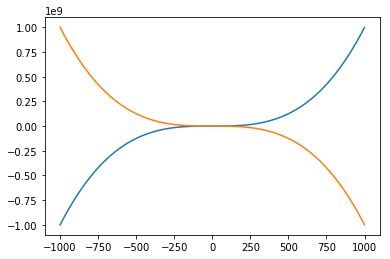

In [39]:
Point = namedtuple("Point", "x y")
O = 'Origin'
a = 1
b = 3
p = 15733
plot_curve(p,a,b)
x_field = []
y_field = []
curve_under_field(p,a,b)
P = Point(x=0,y=0)

In [35]:
#searching for P with prime order q
prime_order = 0
prime_order_point = Point(0,0)
l = len(x_field)
for i in range(l):
    P = Point(x_field[i],y_field[i])
    order,cyclic_group = find_order(P)
    if isPrime(order) and order>5000:
        prime_order = order
        prime_order_point = P
        break
if prime_order!=0:
    print(len(cyclic_group))
print(prime_order,prime_order_point)

5280
5281 Point(x=0, y=4124)


In [7]:
f = open("test.txt","w+") 
k = math.floor(math.log(prime_order,2))
# biniary_string = input("Enter "+str(k)+" digit string")
binary_array = generate_binary(k)
random_strings = []
# print(random_strings)
for i in range(5000):
    random_strings.append(int(binary_array[random.randint(1,(2**10)-1)]))
# print(random_strings)
random_points_x = []
random_points_y = []
random_numbers = []
for i in range(5000):
    d = binaryToDecimal(random_strings[i])
    if d<prime_order:
        random_numbers.append(d)
        q = get_q_fast(P,d)
        random_points_x.append(q.x)
        random_points_y.append(q.y)
#         f.write(str(q)+"\n")

In [8]:
random_numbers = np.array(random_numbers)
random_points_x = np.array(random_points_x)
random_points_y = np.array(random_points_y)
random_numbers = random_numbers[0:10]
random_points_x = random_points_x[0:10]
random_points_y = random_points_y[0:10]

In [12]:
#testing for uniform randomness
#chi square test
dict_numbers = {}
for i in range(len(random_numbers)):
    dict_numbers[random_numbers[i]] = dict_numbers.get(random_numbers[i],0)+1
frequency_array = []
for i in range((2**10)-1):
    frequency_array.append(dict_numbers.get(i,0))
frequency_array = np.asarray(frequency_array)
print(chisquare(frequency_array))

Power_divergenceResult(statistic=1013.0000000000002, pvalue=0.5733456009493356)


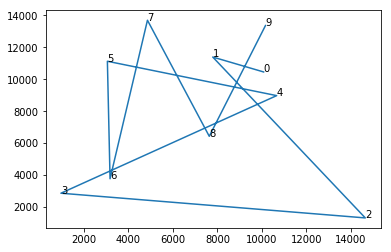

In [10]:
#correlation testing
labels = [0,1,2,4,8,16,32,64,128]
# for x in range(10):
#     labels.append(x)
points_x = []
points_y = []
for x in labels:
    points_x.append(random_points_x[x])
    points_y.append(random_points_y[x])
    print(random_points_x[x],random_points_y[x])
fig, ax = plt.subplots()
ax.plot(points_x,points_y)
for i, txt in enumerate(labels):
    ax.annotate(txt, (points_x[i],points_y[i]))